In [64]:
import pandas as pd
import numpy as np 
from time import time
import matplotlib.pyplot as plt
pd.set_option('display.mpl_style', 'default')
%matplotlib inline

from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics

####Process Data

In [2]:
nyc_rac = pd.read_csv("ny_rac_S000_JT02_2012.csv", dtype = {'h_geocode': object})

count_filter = ['36005', '36047', '36061', '36081', '36085']
nyc_rac = nyc_rac[nyc_rac['h_geocode'].apply(lambda x: x[0:5]).isin(count_filter)]

In [3]:
nyc_rac = nyc_rac[list(nyc_rac.columns)[:-1]]

In [250]:
nyc_rac.head()

,h_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,CNS02,...,CR07,CT01,CT02,CD01,CD02,CD03,CD04,CS01,CS02,group_code
6143,360050001001000,787,233,434,120,279,369,139,1,0,...,8,549,238,105,147,159,143,382,405,36005000100
6144,360050001001013,24,5,14,5,7,10,7,0,0,...,1,13,11,6,2,7,4,13,11,36005000100
6145,360050002001000,329,92,189,48,88,155,86,0,0,...,6,164,165,55,63,69,50,167,162,36005000200
6146,360050002001001,58,11,37,10,12,22,24,0,0,...,0,23,35,10,12,13,12,34,24,36005000200
6147,360050002001002,53,12,32,9,9,27,17,0,0,...,0,25,28,9,10,9,13,21,32,36005000200


In [4]:
nyc_rac.loc[:,('group_code')] = nyc_rac['h_geocode'].apply(lambda x: x[:-4])

In [5]:
nyc_rac_grouped = nyc_rac.groupby('group_code')[list(nyc_rac.columns)[:-1]].agg('sum')

In [6]:
nyc_rac_grouped = nyc_rac_grouped[list(nyc_rac_grouped.columns)[7:27]]

####An array to reference back to group codes

In [7]:
group_code_index = nyc_rac_grouped.index

In [8]:
rac_array = nyc_rac_grouped.values 

In [9]:
rac_array = rac_array.astype(float)

In [10]:
data = scale(rac_array)

####K-Means Clustering

In [11]:
n_samples, n_features = data.shape

In [12]:
n_digits = [2, 3, 4, 5, 6, 7, 8, 9, 10]

In [124]:
estimator = KMeans(n_clusters = 5)

In [125]:
estimator

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances=True, random_state=None, tol=0.0001,
    verbose=0)

In [126]:
estimator.fit(data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances=True, random_state=None, tol=0.0001,
    verbose=0)

In [16]:
# np.random.rand(5)
# estimator.fit(data)

In [204]:
estimator.labels_

array([0, 3, 3, ..., 3, 0, 0], dtype=int32)

In [113]:
# estimator.cluster_centers_

In [128]:
centroids = pd.DataFrame(estimator.cluster_centers_)

In [129]:
centroids.columns = nyc_rac_grouped.columns

In [43]:
# def rescale(col):
#     mean_val = nyc_rac_grouped['CNS10'].mean()
#     std_val = nyc_rac_grouped['CNS10'].std()
    
#     output = (col * std_val) + mean_val
#     return output 

####Rescale Centroids dataframe

In [130]:
for col in centroids.columns:
    centroids[col] = centroids[col].apply(lambda x: (x * nyc_rac_grouped[col].std()) + nyc_rac_grouped[col].mean())

In [131]:
centroids = centroids.transpose()

In [199]:
legend = centroids.columns
legend = ['\nCluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

In [200]:
labels = ["Agriculture, Forestry, Fishing and Hunting", 
"Mining, Quarrying, and Oil and Gas Extraction",
"Utilities",
"Construction",
"Manufacturing",
"Wholesale Trade",
"Retail Trade",
"Transportation and Warehousing",
"Information",
"Finance and Insurance",
"Real Estate and Rental and Leasing",
"Professional, Scientific, and Technical Services",
"Management of Companies and Enterprises",
"Administrative, Support, Waste Management",
"Educational Services",
"Health Care and Social Assistance",
"Arts, Entertainment, and Recreation",
"Accommodation and Food Services",
"Other Services [except Public Administration]",
"Public Administration"]

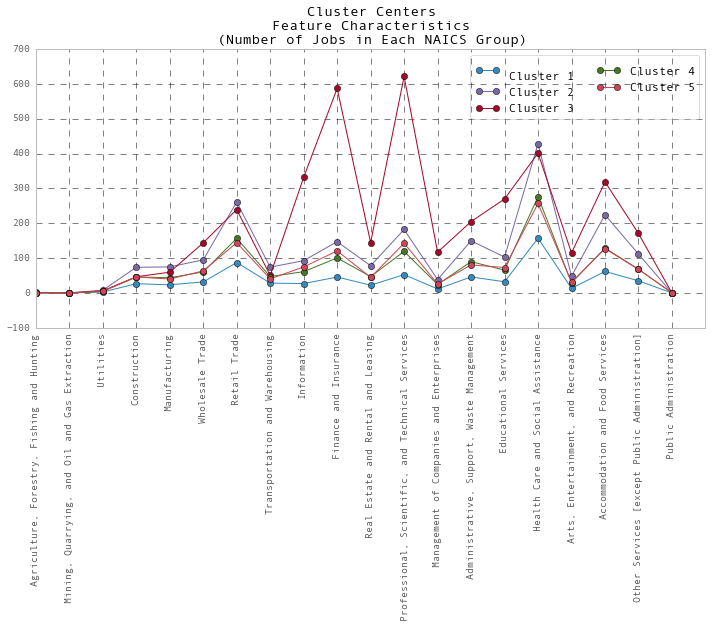

In [201]:
fig, ax = plt.subplots(figsize = (12,5))
ax.plot(centroids, marker = 'o')
ax.set_xticks(range(20))
ax.set_xticklabels(labels, rotation=90)
ax.grid(b=True, which='major', linestyle='--')
ax.legend(legend, loc = 'upper right', ncol = 2)
ax.set_title("Cluster Centers \nFeature Characteristics \n(Number of Jobs in Each NAICS Group)")

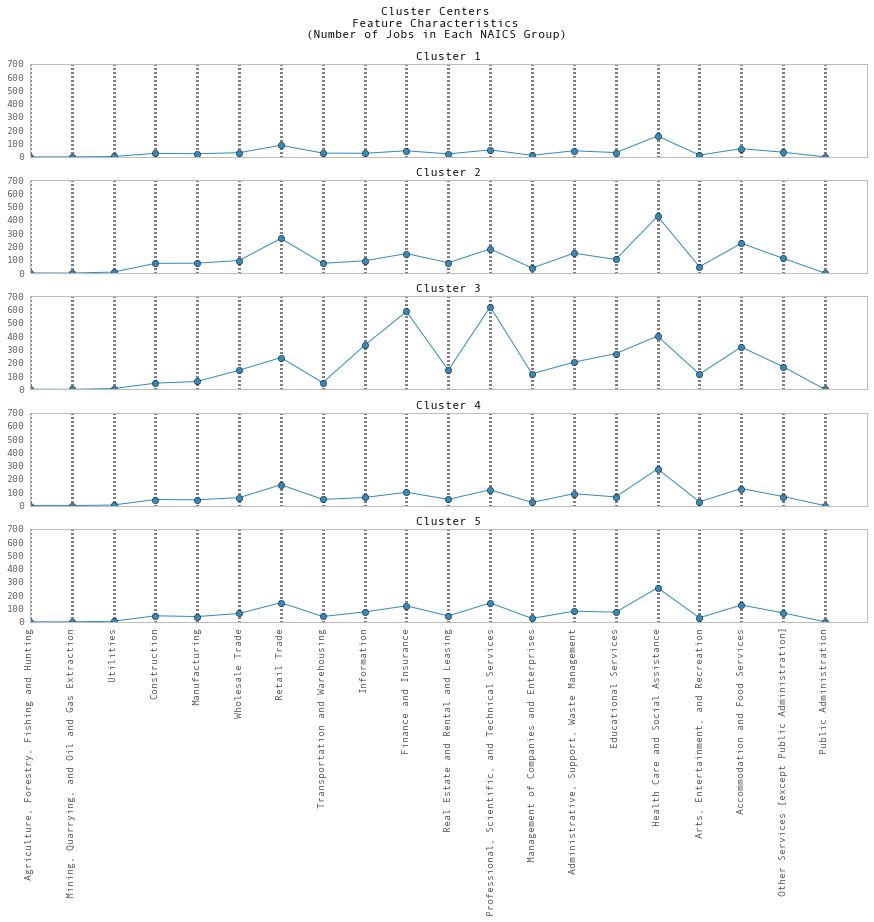

In [202]:
fig1, ax1 = plt.subplots(5, 1, sharex = True, sharey = True, figsize = (15,10))
fig1.subplots_adjust(hspace=.25)
fig1.suptitle("Cluster Centers \nFeature Characteristics \n(Number of Jobs in Each NAICS Group)\n", fontsize=12)
[ax1[i].plot(centroids[i], marker = 'o') for i in range(5)]
[ax1[i].set_xticks(range(20)) for i in range(5)]
[ax1[i].set_ylim(0,700) for i in range(5)]
[ax1[i].set_xticklabels(labels, rotation=90) for i in range(5)]
[ax1[i].xaxis.grid(linewidth=3) for i in range(5)]
[ax1[i].yaxis.grid(False) for i in range(5)]
[ax1[i].set_title(legend[i], fontsize = 12) for i in range(5)]

In [ ]:
%matplotlib inline
titles = ['A 1.00 & fre = 110', 'A 0.75 & fre = 220',\
           'A 0.50 & fre = 4400', 'White Noise']

fig3, ax3 = plt.subplots(4, 1, sharex = True, sharey = True, figsize = (14,14))
fig3.subplots_adjust(hspace=.5)

[ax3[i].semilogx(freqs[i], magnitude_spectrum[i]) for i in range(4)]
[ax3[i].grid('on') for i in range(4)]
[ax3[i].set_title(titles[i], fontsize = 12.0) for i in range(4)]
[ax3[i].set_xlabel("Amplitude", fontsize = 12.0) for i in range(4)]
[ax3[i].grid(b=True, which='both', color='0.6',linestyle='--') for i in range(4)]
[ax3[i].set_xlim([20, 5000]) for i in range(4)]

In [206]:
len(group_code_index)
# len(estimator.labels_)

2168

In [208]:
group_code_index = pd.Series(group_code_index)
estimator_labels = pd.Series(estimator.labels_)

In [211]:
df = pd.concat([group_code_index, estimator_labels], axis=1)

In [264]:
df.columns = ['census_tract', 'cluster']

In [371]:
df.to_csv("cluster")

,census_tract,cluster,code
0,36005000100,0,2000100
1,36005000200,3,2000200
2,36005000400,3,2000400
3,36005001600,3,2001600
4,36005001900,0,2001900


In [214]:
import geopandas as gp

In [237]:
census_tracts = gp.GeoDataFrame.from_file("nycem_shapfiles/nyct2010_15b/nyct2010.shp")

In [247]:
census_tracts['BoroCT2010'].head()

0    5000900
1    5012500
2    5013301
3    5019700
4    5002002
Name: BoroCT2010, dtype: object

In [297]:
census_tracts[census_tracts['BoroCT2010'] == '2000100']

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry
1261,2000100,2,Bronx,I,000100,1,BX98,Rikers Island,3710,18154596.1687,18903.346859,"POLYGON ((1019454.697021484 225654.3287963867,..."


In [295]:
def boroConverstion(row):
    Boro = row['census_tract'][2:-6]
    CT = row['census_tract'][-6:]
    new_Boro = counties_dict[Boro]
    return new_Boro + CT
#     new_BoroCT = new_Boro + CT
#     return new_BoroCT

In [305]:
counties_dict = {
    '085': '5',
    '005': '2',
    '047': '3',
    '061': '1',
    '081': '4'
}

In [298]:
df.loc[:,("code")] = df.apply(boroConverstion, axis=1)

In [304]:
df1 = pd.merge(df, census_tracts[['BoroCT2010', 'Shape_Area', 'BoroName', 'geometry']], left_on = ['code'], right_on = ['BoroCT2010'])

In [323]:
df1 = gp.GeoDataFrame(df1)

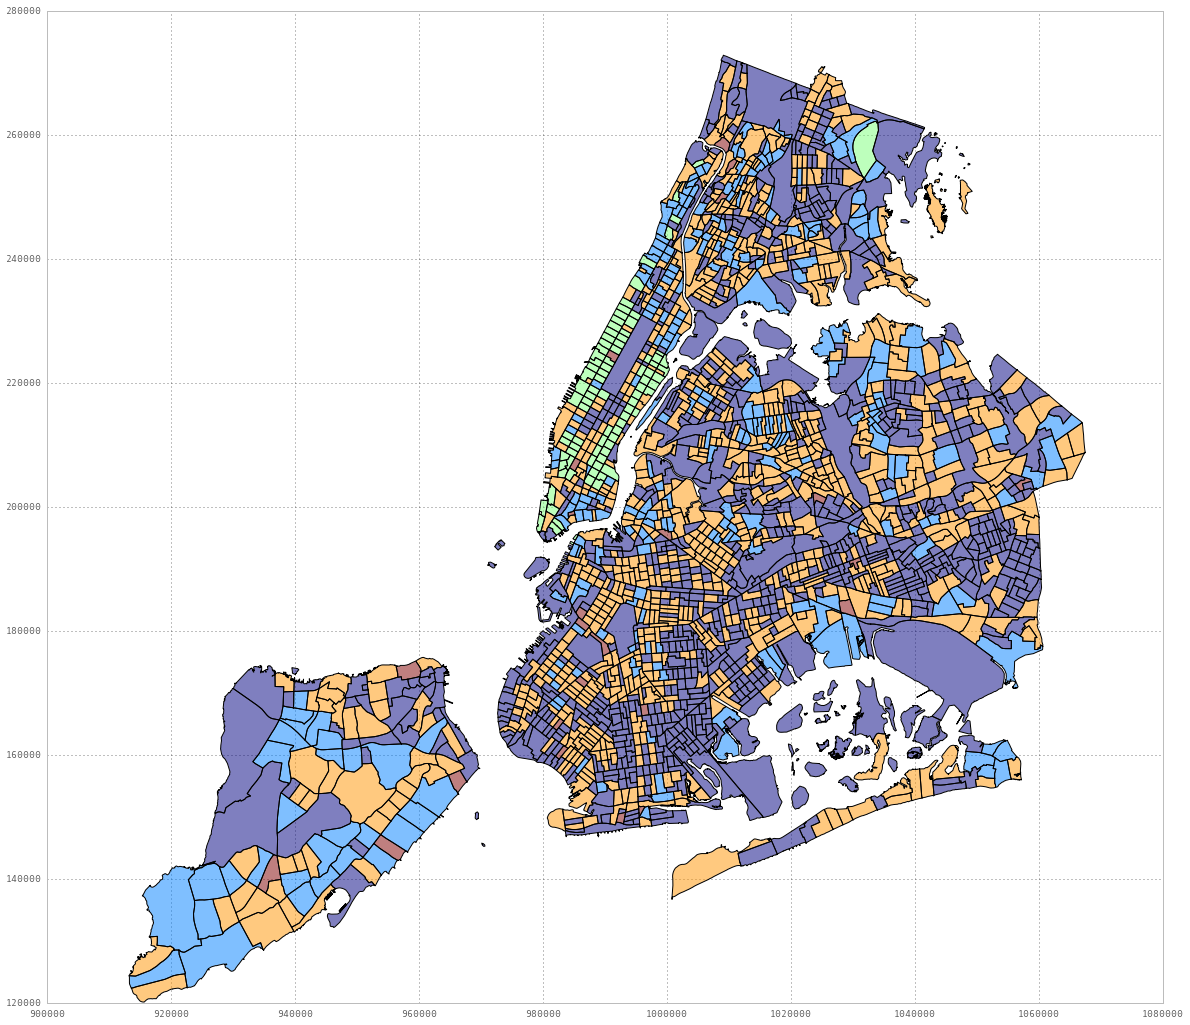

In [363]:
plt.figure(figsize = (20,20))
df1.plot('cluster') #, colormap = 'Dark2')

In [364]:
df1.to_file("mapClusters.shp")

In [366]:
TEST = gp.GeoDataFrame.from_file("mapClusters.shp")

In [369]:
mkdir mapClusters

mv: rename mapClusters to mapClusters/mapClusters: Invalid argument


In [334]:
from shapely.geometry import Polygon
from descartes import PolygonPatch

p1 = Polygon([(0, 0), (1, 0), (1, 1)])
p2 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])

In [318]:
g = gp.GeoSeries([p1, p2, p3])

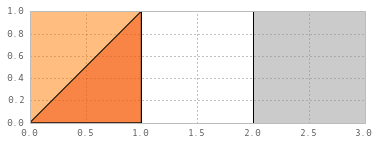

In [335]:
g.plot()

In [340]:
df1.head()

,census_tract,cluster,code,BoroCT2010,Shape_Area,BoroName,geometry
0,36005000100,0,2000100,2000100,18154596.16870,Bronx,"POLYGON ((1019454.697021484 225654.3287963867,..."
1,36005000200,3,2000200,2000200,5051755.77015,Bronx,"POLYGON ((1023972.527832031 232680.6583862305,..."
2,36005000400,3,2000400,2000400,8549999.82000,Bronx,(POLYGON ((1025453.869995117 236018.7463989258...
3,36005001600,3,2001600,2001600,5221332.41430,Bronx,"POLYGON ((1024344.111633301 238946.0208129883,..."
4,36005001900,0,2001900,2001900,17964480.95910,Bronx,(POLYGON ((1012821.805786133 229228.2645874023...


In [87]:
# sample_size = 300

# def bench_k_means(estimator, name, data):
#     t0 = time()
#     estimator.fit(data)
#     print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
#           % (name, (time() - t0), estimator.inertia_,
#              metrics.homogeneity_score(labels, estimator.labels_),
#              metrics.completeness_score(labels, estimator.labels_),
#              metrics.v_measure_score(labels, estimator.labels_),
#              metrics.adjusted_rand_score(labels, estimator.labels_),
#              metrics.adjusted_mutual_info_score(labflabels,  estimator.labels_),
#              metrics.silhouette_score(data, estimator.labels_,
#                                       metric='euclidean',
#                                       sample_size=sample_size)))

In [68]:
# print(79 * '_')
# print('% 10s' % 'Clusters'
#       '     time   inertia   homo    compl   v-meas  ARI     AMI      silhouette')
# for cluster in n_digits:
#     name = str(cluster) + " clusters"
#     bench_k_means(KMeans(n_clusters = cluster), name = name, data = data)

In [71]:
# bench_k_means(KMeans(init=pca.components_, n_clusters=5, n_init=1),
#               name="PCA-based",
#               data=data)

In [70]:
# h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

# # Plot the decision boundary. For that, we will assign a color to each
# x_min, x_max = reduced_data[:, 0].min() + 1, reduced_data[:, 0].max() - 1
# y_min, y_max = reduced_data[:, 1].min() + 1, reduced_data[:, 1].max() - 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# # Obtain labels for each point in mesh. Use last trained model.
# Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.figure(1)
# plt.clf()
# plt.imshow(Z, interpolation='nearest',
#            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
#            cmap=plt.cm.Paired,
#            aspect='auto', origin='lower')

# plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# # Plot the centroids as a white X
# centroids = kmeans.cluster_centers_
# plt.scatter(centroids[:, 0], centroids[:, 1],
#             marker='x', s=169, linewidths=3,
#             color='w', zorder=10)
# plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
#           'Centroids are marked with white cross')
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())
# plt.show()